In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn import preprocessing


In [2]:
# import the dataset
data = pd.read_csv('bank.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


#Exploratory Data Analysis

In [3]:
# Feature engineering : transformation of the variables
def Encoding(data) :

  
    # encoding the str variables
    le = preprocessing.LabelEncoder()
    le.fit(data['job'])
    data['job'] = le.transform(data['job'])
    
    # data['marital']=data['marital'].astype('str')
    le.fit(data['marital'])
    data['marital'] = le.transform(data['marital'])

    le.fit(data['education'])
    data['education'] = le.transform(data['education'])

    le.fit(data['default'])
    data['default'] = le.transform(data['default'])

    le.fit(data['balance'])
    data['balance'] = le.transform(data['balance'])

    le.fit(data['housing'])
    data['housing'] = le.transform(data['housing'])

    le.fit(data['loan'])
    data['loan'] = le.transform(data['loan'])

    le.fit(data['contact'])
    data['contact'] = le.transform(data['contact'])

    le.fit(data['month'])
    data['month'] = le.transform(data['month'])
    
    le.fit(data['poutcome'])
    data['poutcome'] = le.transform(data['poutcome'])

    le.fit(data['deposit'])
    data['deposit'] = le.transform(data['deposit'])

    return data

data = Encoding(data)


Text(0.5, 1.0, 'Correlation_matrix')

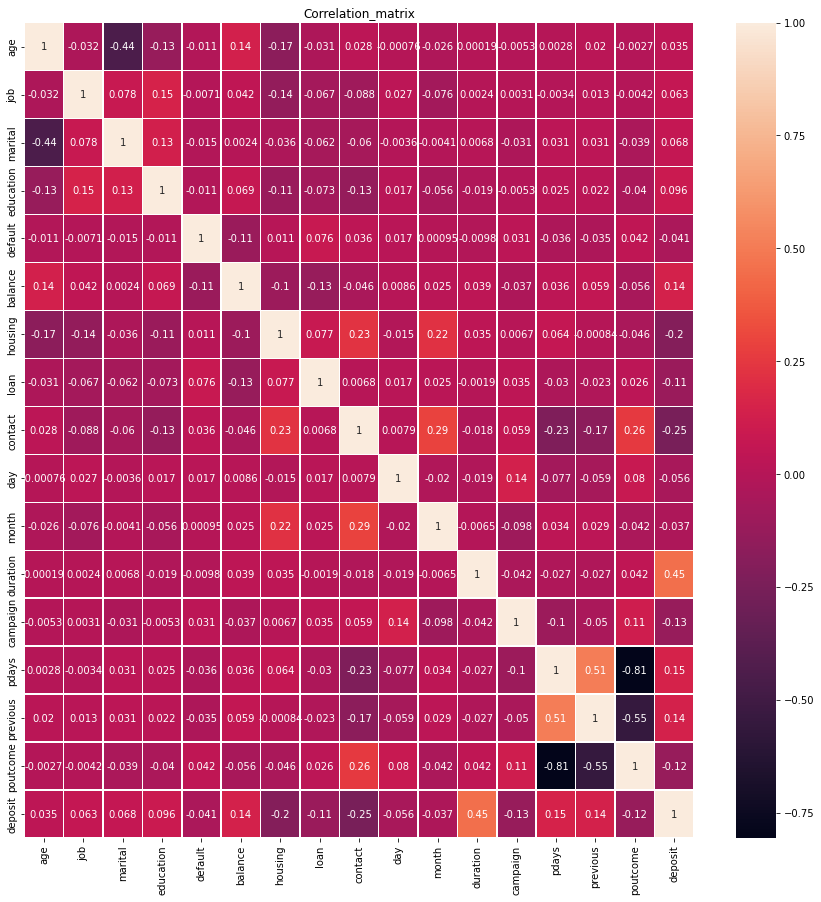

In [4]:
# compute the correlation matrix
cormat = data.corr()
round(cormat,2)
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
sns.heatmap(cormat, annot=True, linewidths=.5, ax=ax)
plt.title("Correlation_matrix")

In [5]:
features = data.iloc[:,:-1].values
target = data.iloc[:,-1].values

In [6]:
# splitting the data btw train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

In [7]:
# Standardize features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)

scaler.fit(X_test)
X_test = scaler.transform(X_test)

In [13]:
# PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

In [14]:
features_modif = data.iloc[:,:-1].drop(columns=['age','month','day']).values

In [15]:
X_train_modif, X_test_modif, y_train, y_test = train_test_split(features_modif, target, test_size=0.2)
scaler = StandardScaler()

scaler.fit(X_train_modif)
X_train = scaler.transform(X_train_modif)

scaler.fit(X_test_modif)
X_test = scaler.transform(X_test_modif)

# Models

In [8]:
scores_modeles = pd.DataFrame(columns=['model_name', 'score'])

In [16]:
# train the model (logistic regression) with PCA
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV
parameter = [{'penalty':['l2','l1','elasticnet', 'none'],'C':[0.25,0.5,0.75,1],'intercept_scaling':[1,0.5,2]}]
grid_search_log=GridSearchCV(estimator=LogisticRegression(),
                         param_grid=parameter,
                         scoring='accuracy',
                         cv=18,
                         n_jobs=-1)
grid_search_log.fit(X_train_pca,y_train)
best_accuracy_log=grid_search_log.best_score_
best_params_log=grid_search_log.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy_log*100))
print("Best Parameters:", best_params_log)

Best Accuracy: 52.65 %
Best Parameters: {'C': 0.25, 'intercept_scaling': 1, 'penalty': 'l2'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
432 fits failed out of a total of 864.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
216 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Sol

In [18]:
# train the model (logistic regression) without PCA

parameter = [{'penalty':['l2','l1','elasticnet', 'none'],'C':[0.25,0.5,0.75,1],'intercept_scaling':[1,0.5,2]}]
grid_search_log=GridSearchCV(estimator=LogisticRegression(),
                         param_grid=parameter,
                         scoring='accuracy',
                         cv=18,
                         n_jobs=-1)
grid_search_log.fit(X_train,y_train)
best_accuracy_log=grid_search_log.best_score_
best_params_log=grid_search_log.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy_log*100))
print("Best Parameters:", best_params_log)

Best Accuracy: 79.52 %
Best Parameters: {'C': 0.25, 'intercept_scaling': 1, 'penalty': 'none'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
432 fits failed out of a total of 864.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
216 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Sol

In [17]:
# train the model (logistic regression) without PCA and without age, month, day

parameter = [{'penalty':['l2','l1','elasticnet', 'none'],'C':[0.25,0.5,0.75,1],'intercept_scaling':[1,0.5,2]}]
grid_search_log=GridSearchCV(estimator=LogisticRegression(),
                         param_grid=parameter,
                         scoring='accuracy',
                         cv=18,
                         n_jobs=-1)
grid_search_log.fit(X_train_modif,y_train)
best_accuracy_log=grid_search_log.best_score_
best_params_log=grid_search_log.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy_log*100))
print("Best Parameters:", best_params_log)

Best Accuracy: 77.47 %
Best Parameters: {'C': 0.75, 'intercept_scaling': 1, 'penalty': 'l2'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
432 fits failed out of a total of 864.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
216 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Sol

We are keeping the dataset without the transformation (PCA, modification) because it performs better

In [19]:
# predict the results of the model
y_pred_log = grid_search_log.predict(X_test)

# Show confusion matrix
conf_matr_log = confusion_matrix(y_test, y_pred_log)
print(conf_matr_log)

[[956 216]
 [239 822]]


In [20]:
# keeping the score
scoreDF = pd.DataFrame({'model_name': ['Logistic Regression'],'score': [best_accuracy_log]})
scores_modeles=scores_modeles.append(scoreDF,ignore_index=True)

In [44]:
accuracy_score(y_test, y_pred_log)

0.7962382445141066

## Support Vector Machine

In [21]:
from sklearn.svm import SVC
parameter = [{'kernel':['rbf','linear'],'C':[0.1,0.5,0.9]}]
grid_search_svm=GridSearchCV(estimator=SVC(),
                         param_grid=parameter,
                         scoring='accuracy',
                         cv=10,
                         n_jobs=-1)
grid_search_svm.fit(X_train,y_train)
best_accuracy_svm=grid_search_svm.best_score_
best_params_svm=grid_search_svm.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy_svm*100))
print("Best Parameters:", best_params_svm)

Best Accuracy: 80.82 %
Best Parameters: {'C': 0.9, 'kernel': 'rbf'}


In [22]:
scoreDF = pd.DataFrame({'model_name': ['SVC'],'score': [best_accuracy_svm]})
scores_modeles=scores_modeles.append(scoreDF,ignore_index=True)

In [23]:
# predict the results of the model
y_pred_log = grid_search_log.predict(X_test)

# Show confusion matrix
conf_matr_log = confusion_matrix(y_test, y_pred_log)
print(conf_matr_log)

[[956 216]
 [239 822]]


In [43]:
accuracy_score(y_test, y_pred_log)

0.7962382445141066

## Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

parameter = [{'splitter':["best", "random"],'criterion':["gini", "entropy", "log_loss"]}]
grid_search_dt=GridSearchCV(estimator=DecisionTreeClassifier(),
                         param_grid=parameter,
                         scoring='accuracy',
                         cv=18,
                         n_jobs=-1)
grid_search_dt.fit(X_train,y_train)
best_accuracy_dt=grid_search_dt.best_score_
best_params_dt=grid_search_dt.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy_dt*100))
print("Best Parameters:", best_params_dt)

Best Accuracy: 73.71 %
Best Parameters: {'criterion': 'entropy', 'splitter': 'random'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
36 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_mes

In [25]:
scoreDF = pd.DataFrame({'model_name': ['Decision Tree'],'score': [best_accuracy_dt]})
scores_modeles=scores_modeles.append(scoreDF,ignore_index=True)

In [26]:
# predict the results of the model
y_pred_dt = grid_search_dt.predict(X_test)

# Show confusion matrix
conf_matr_dt = confusion_matrix(y_test, y_pred_dt)
print(conf_matr_dt)

[[915 257]
 [283 778]]


In [42]:
accuracy_score(y_test, y_pred_dt)

0.7581728616211375

## Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier
parameter = [{'n_estimators':[100,50,150,200],'criterion':["gini", "entropy", "log_loss"]}]
grid_search_rf=GridSearchCV(estimator=RandomForestClassifier(),
                         param_grid=parameter,
                         scoring='accuracy',
                         cv=18,
                         n_jobs=-1)
grid_search_rf.fit(X_train,y_train)
best_accuracy_rf=grid_search_rf.best_score_
best_params_rf=grid_search_rf.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy_rf*100))
print("Best Parameters:", best_params_rf)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
72 fits failed out of a total of 216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
72 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

Best Accuracy: 80.84 %
Best Parameters: {'criterion': 'entropy', 'n_estimators': 200}


In [28]:
scoreDF = pd.DataFrame({'model_name': ['Random Forest'],'score': [best_accuracy_rf]})
scores_modeles=scores_modeles.append(scoreDF,ignore_index=True)

In [29]:
# predict the results of the model
y_pred_rf = grid_search_rf.predict(X_test)

# Show confusion matrix
conf_matr_rf = confusion_matrix(y_test, y_pred_dt)
print(conf_matr_rf)

[[915 257]
 [283 778]]


In [41]:
accuracy_score(y_test, y_pred_rf)

0.8222122704881325

## KNN

In [30]:
from sklearn.neighbors import KNeighborsClassifier
parameters = [{"n_neighbors" : [3,5,10,15,20]
               }]
grid_search_knn = GridSearchCV(estimator = KNeighborsClassifier(),
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search_knn.fit(X_train, y_train)
best_accuracy_knn = grid_search_knn.best_score_
best_parameters_knn = grid_search_knn.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy_knn*100))
print("Best Parameters:", best_parameters_knn)

Best Accuracy: 78.44 %
Best Parameters: {'n_neighbors': 15}


In [31]:
scoreDF = pd.DataFrame({'model_name': ['KNN'],'score': [best_accuracy_knn]})
scores_modeles=scores_modeles.append(scoreDF,ignore_index=True)
scores_modeles

,model_name,score
0,Logistic Regression,0.795165
1,SVC,0.808154
2,Decision Tree,0.737147
3,Random Forest,0.808377
4,KNN,0.784411


In [33]:
# predict the results of the model
y_pred_knn = grid_search_knn.predict(X_test)

# Show confustion matrix

conf_matr_knn = confusion_matrix(y_test, y_pred_knn)
print(conf_matr_knn)

[[952 220]
 [256 805]]


In [40]:
accuracy_score(y_test, y_pred_knn)

0.786833855799373

## XGBoost

In [34]:
from sklearn.ensemble import GradientBoostingClassifier


clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.8190774742498881

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

parameters = [{"n_estimators" : [100,150,200],
               "learning_rate" : [0.1,0.09,0.01],
                "max_depth" : [1,10]
               }]
grid_search_xgboost = GridSearchCV(estimator = clf,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search_xgboost.fit(X_train, y_train)
best_accuracy_xg = grid_search_xgboost.best_score_
best_parameters = grid_search_xgboost.best_params_

In [36]:
print("best_accuracy : {:.2f} %".format(best_accuracy_xg*100))
print("Best Parameters:", best_parameters)

best_accuracy : 81.01 %
Best Parameters: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 200}


In [37]:
# predict the results of the model
y_pred_xgb = grid_search_xgboost.predict(X_test)

# Show confustion matrix
conf_matr_xgb = confusion_matrix(y_test, y_pred_xgb)
print(conf_matr_xgb)

[[960 212]
 [189 872]]


In [38]:
accuracy_score(y_test, y_pred_xgb)

0.8204209583519928

In [39]:
scoreDF = pd.DataFrame({'model_name': ['XGboost'],'score': [best_accuracy_xg]})
scores_modeles=scores_modeles.append(scoreDF,ignore_index=True)
scores_modeles

,model_name,score
0,Logistic Regression,0.795165
1,SVC,0.808154
2,Decision Tree,0.737147
3,Random Forest,0.808377
4,KNN,0.784411
5,XGboost,0.810058


# Find the best model

In [45]:
best = scores_modeles[scores_modeles.score == max(scores_modeles.score)]['model_name'].values[0]
print(f'the best model is {best} with an accuracy of {round(max(scores_modeles.score),3)}')

the best model is XGboost with an accuracy of 0.81
